# Project 2: Find Ppc, Tpc, and Z-factor for gases

#### Assigned: February 14, 2022

#### Due: March 2, 2022

**Use the D2L discussion board to ask questions or respond to the questions of your classmates. All TAs and Instructors are available to assist you when you face a problem in completing your project.**



## Gas Properties:

Use the functions you have developed in Project#1 for evaluating gas properties. 

In [1]:
# All libraries you need for this project. Run this cell once.
import math
import pandas as pd
import matplotlib.pyplot as plt

### Part 1: Gas Compressibility Factor
Use the functions you have developed in Project#1 for evaluating gas properties.
##### Note 1: these correlations are valued for 0.57<gamma_G<1.68, with CO2<12%mole, N2<3%mole, and no H2S.
##### Note 2: temp is in Fahrenheit and pres is in psia. 
##### Note 3: Ppc is in Psia, and Tpc is in Rankine. 
##### Note 4: The reduced pressure and tempertaure have been evaulaed in ZFACT function. 

In [2]:
# Note 1: these correlations are valued for 0.57<gamma_G<1.68, with CO2<12%mole, N2<3%mole, and no H2S.
# Note 2: temp is in Fahrenheit and pres is in psia. 
# Note 3: Ppc is in Psia, and Tpc is in Rankine. 
# Note 4: The reduced pressure and tempertaure have been evaulaed in ZFACT function. 
def TPC1(gamma_G):
    value_TPC1 = 169.2 + 349.5 * gamma_G - 74 * (gamma_G * gamma_G)
    return value_TPC1

def PPC1(gamma_G):
    value_PPC1 = 756.8 - 131 * gamma_G - 3.6 * (gamma_G * gamma_G)
    return value_PPC1

def ZFACT(temp, pres, gamma_G):
    Tpr = (temp+459.69)/TPC1(gamma_G)
    Ppr = pres/PPC1(gamma_G)
    A = 1.39 * (Tpr - 0.92) ** 0.5 - 0.36 * Tpr - 0.101
    B = Ppr * (0.62 - 0.23 * Tpr) + (0.066 / (Tpr - 0.86) - 0.037) * (Ppr ** 2) + 0.32 * Ppr ** 6 / (10 ** (9 * (Tpr - 1)))
    C = 0.132 - (0.32 * (math.log10(Tpr)))
    D = 10 ** (0.3106 - 0.49 * Tpr + 0.1824 * (Tpr ** 2))
    value_ZFACT = A + (1 - A) * math.exp(-B) + C * Ppr ** D
    return value_ZFACT

### Part 2: Define New Functions for Gas Viscosity and Gas Formation Volume Factor

Define a fucntion called GFVF(temp, pres, gamma_G). When Pres is in psia and Temp in Fahrenheit, gas formation volume factor (in bbl/SCF) is:

$Bg = 0.005035 Z (T+459.69)/P$

Define a function called GVISC(temp, pres, gamma_G) using correlation of Lee et. al (derived purely for sweet gas, see the uploaded paper): 

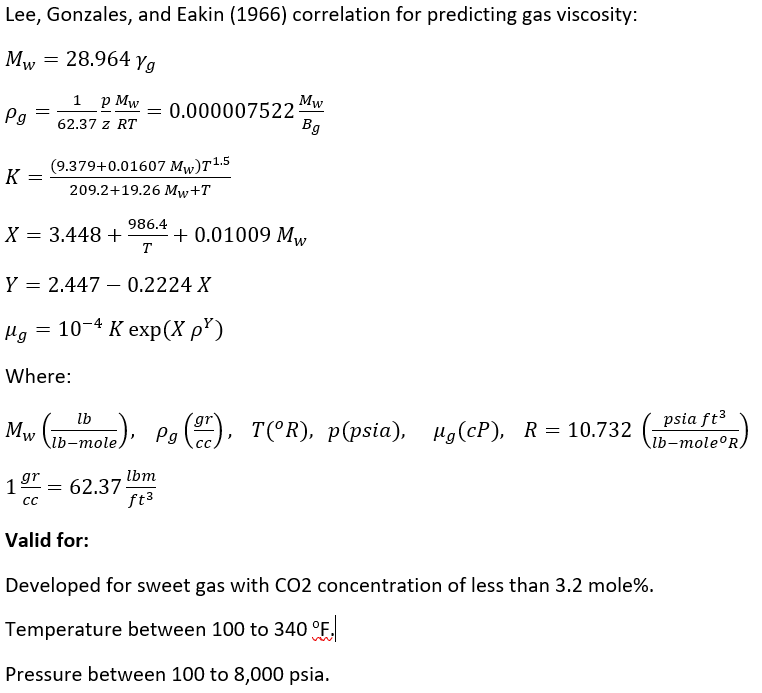

##### Note 1: In above correlation, when P is in psia and T in Rankine, the function returns the gas viscosity in cP. 
##### Note 2: Remember, when calling the function GVISC, we want to pass "pres" is in psia and "temp" in Fahrenheit.  Therefore, you need to convert temp to Rankine inside the GVISC function. You can call GFVF inside the GVISC function. See the above example when we call PPC1 and TPC1 functions in ZFACT function. 

In [3]:
##T in Fahrenheit, P in psia, gas FVF in bbl/cu.ft, gas viscosity in cP

def GFVF(temp, pres, Gamma_G):
    pass

def GVISC(temp, pres, gamma_G):
    pass

##### Test functions
Plot z-factor, gas FVF, and gas viscosity for the specific gas gravity of 0.65 at T=170 degree Farenheight when Pressure changes from 1000 to 5000 psia.

In [4]:
##this is what I have written for testing the above functions. You may choose to write in a different format

# gamma_G=0.65
# y1_zfactor=list()
# y2_fvf=list()
# y3_visc=list()
# x_pressure=list()
# temp=170
# for p in range(1000,5200,200):
#     pres = p
#     z_factor_value=ZFACT(temp,pres,gamma_G)
#     GFVF_value=GFVF(temp,pres,gamma_G)
#     GVISC_value=GVISC(temp,pres,gamma_G)
#     y1_zfactor.append(z_factor_value)
#     y2_fvf.append(GFVF_value)
#     y3_visc.append(GVISC_value)
#     x_pressure.append(p)

# data_zfactor = {
#       "pressure": x_pressure,
#       "z factor":y1_zfactor
#     }

# df_zfact = pd.DataFrame(data_zfactor)

# print(df_zfact)
# df_zfact.plot(kind='scatter',x='pressure',y='z factor')
# plt.show()

# data_gfvf = {
#       "pressure": x_pressure,
#       "FVF":y2_fvf
#     }

# df_gfvf = pd.DataFrame(data_gfvf)

# print(df_gfvf)
# df_gfvf.plot(kind='scatter',x='pressure',y='FVF')
# plt.show()

# data_gvisc = {
#       "pressure": x_pressure,
#       "Viscosity":y3_visc
#     }

# df_gvisc = pd.DataFrame(data_gvisc)

# print(df_gvisc)
# df_gvisc.plot(kind='scatter',x='pressure',y='Viscosity')
# plt.show()


## Pressure Traverse in a Gas Well:

### Part 3: Define a Function to Calculate the Pressure drop for Gas Flow in a Vertical Pipe 

PRESSURE2(dL, ID, epsilon, q_gas, pres1, Tave, Pave, gamma_G) where dL is the length of the well section that we evaluate the pressure drop, D is the tubing ID, pres1 is the pressure at point 1, epsilon is the surface roughness, q_gas is the gas flow rate, Pave is the average pressure and Tave is the avergae temperature in that section. 

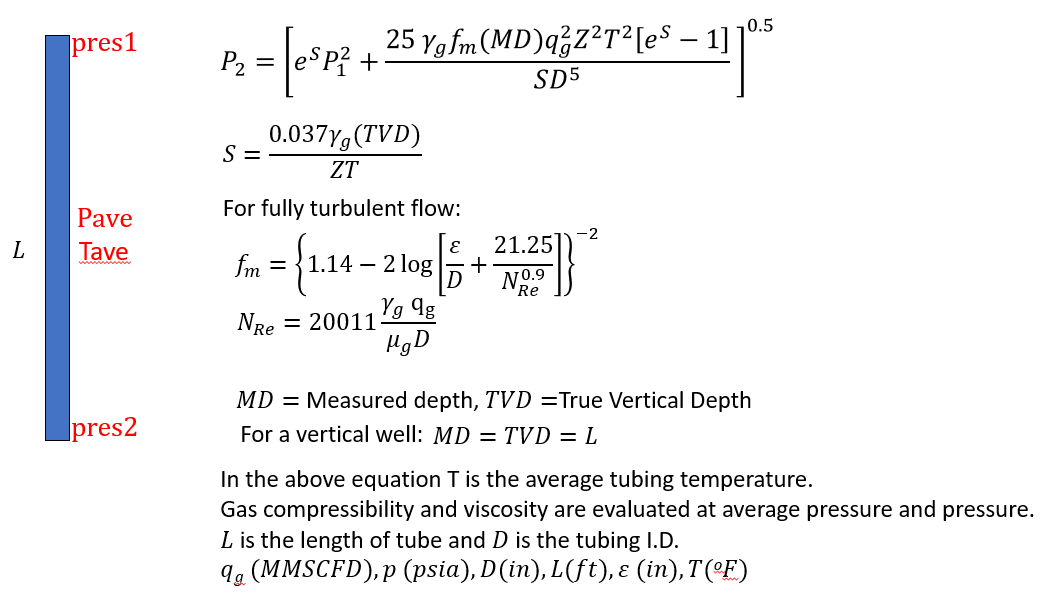

In [5]:
## this is only a suggested format for this function.

def PRESSURE2(dL, ID, epsilon, q_gas, pres1, Tave, Pave, gamma_G): 
    pass

### Part 4: Plot the Pressure Traverse for a Vertical Gas Well

Using the given parameters for production from a dry gas reservoir, find the pressure as a function of depth in the tubing (from wellhead to wellbore). Divide the well into 500 ft sections.  

##### Note: The solution for pressure at any section will be iterative since z-factor and gas viscosity depend on the average pressure and tempertaure in that section. 

Suggested procedure for iteration at each section is:

**Step 1:** Assume a value for the pressure at point 2 (pres2). You may choose pres2=pres1

**Step 2:** calculate the average pressure: Pave = (pres1+pres2)/2

**Step 3:** calculate the average temperature in that section with the assumption of linear temperature profile

**Step 4:** calculate the pressure at point 2 by calling the PRESSURE2 function. Remember that in PRESSURE2 function, z-factor and gas viscosity should be evaluated at the average pressure and temperature

**Step 5:** Update the average pressure (Step 2)

##### Iterate the above stpes untill the change in pressure at point 2 or the average pressure is less than 0.00001.

In [6]:
## Information about the gass well:

L = 10000 #ft, well length
ID = 1.995 #in, well tubing I.D.
Twh = 100 #degree F, wellhead tempertaure
Twf = 200 #degree F, bottomhole temperature
gamma_G = 0.7 # gas gravity
Pwh = 4000 #psia, wellhead pressure
epsilon = 0.0018 #in, tube roughness
q_gas = 15 #MMSCFD, gas flow rate
n = 20 # number of well segments
dL = L/n #ft, length of each segment


### Bonus: Find the Natural Gas Flow for the Above Well 

#### 1. Construct TPR
For the above well, plot Pwf vs. q_gas when the gas flow rates changes from 1 MMSCF to 50 MMSCF.

**Note:** You can convert the above iterative procedure to a function which can return Pwf for each q_gas. When calculating Pwf, divide the well into 500 ft sections.

#### 2. Construct IPR
Use C and n method to plot Pwf vs. q_gas for gas flow rates changes from 1 MMSCF to 50 MMSCF. From a test data, C and n were calcualted as:

$n = 0.86$\
$C = 2\times 10^{-5} MMSCFD/psia^{2n}$

#### 3. Find the natural flow from the intersect of IPR and TPR curves

# How to submit your work:
  
Run your file. 

Upload the Jupyter Notbook file and also the PDF version.  

To make PDF, press ctrl+p and save as PDF.
  